<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/joon0425/20230307/5%EC%9E%A5_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손실 함수

MSELoss(회귀) : 평균 제곱 오차  
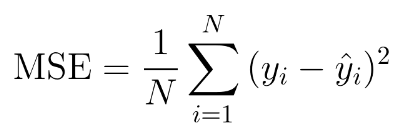  
BCELoss(이진 분류) : 이진 분류용 교차 엔트로피 함수  
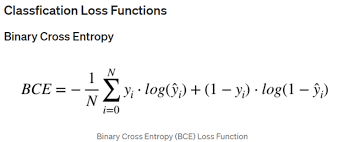  
CrossEntropyLoss(다중 분류) : 다중 분류용 교차 엔트로피 함수  
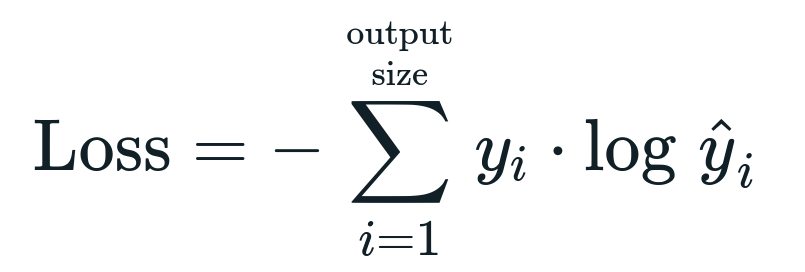

In [1]:
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
from IPython.display import display
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [2]:
torch.manual_seed(123)
l1=nn.Linear(1,1)
print(l1)
for param in l1.named_parameters():
  print('name: {}\ntensor: {}\nshape: {}'.format(param[0],param[1],param[1].shape))
nn.init.constant_(l1.weight,2.0)
nn.init.constant_(l1.bias,1.0)
print(l1.weight,l1.bias)
#test data
x_np=np.arange(-2,2.1,1)
x=torch.tensor(x_np).float()
x=x.view(-1,1)
print(x.shape)
print(x)
y=l1(x)
print(y.shape)
print(y.data)

Linear(in_features=1, out_features=1, bias=True)
name: weight
tensor: Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape: torch.Size([1, 1])
name: bias
tensor: Parameter containing:
tensor([0.0331], requires_grad=True)
shape: torch.Size([1])
Parameter containing:
tensor([[2.]], requires_grad=True) Parameter containing:
tensor([1.], requires_grad=True)
torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])
torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


In [3]:
l2=nn.Linear(2,1)
nn.init.constant_(l2.weight,1.0)
nn.init.constant_(l2.bias,2.0)
print(l2.weight,l2.bias)
x2_np=np.array([[0,0],[0,1],[1,0],[1,1]])
x2=torch.tensor(x2_np).float()
print(x2.shape,x2)
y2=l2(x2)
print(y2.shape,y2.data)

Parameter containing:
tensor([[1., 1.]], requires_grad=True) Parameter containing:
tensor([2.], requires_grad=True)
torch.Size([4, 2]) tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
torch.Size([4, 1]) tensor([[2.],
        [3.],
        [3.],
        [4.]])


org data (506, 13) (506,)
features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOW' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
after (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
answer
[24.  21.6 34.7 33.4 36.2]


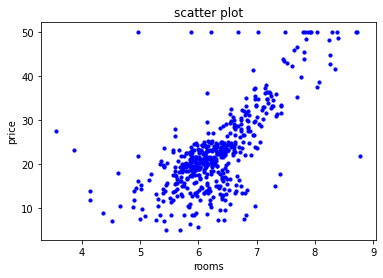

In [4]:
data_url="http://lib.stat.cmu.edu/datasets/boston"
raw_df=pd.read_csv(data_url,sep="\s+",skiprows=22,header=None)
x_org=np.hstack([raw_df.values[::2,:],raw_df.values[1::2,:2]])
yt=raw_df.values[1::2,2]
feature_names=np.array(['CRIM','ZN','INDUS','CHAS','NOW','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
print('org data',x_org.shape,yt.shape)
print('features: ',feature_names)
x=x_org[:,feature_names=='RM']
print('after',x.shape)
print(x[:5,:])
print('answer')
print(yt[:5])
plt.scatter(x,yt,s=10,c='b')
plt.xlabel('rooms')
plt.ylabel('price')
plt.title('scatter plot')
plt.show()

In [5]:
n_input=x.shape[1]
n_output=1
print(f'dimension of input data: {n_input}\ndimension of output data: {n_output}')
class Net(nn.Module):
  def __init__(self,n_input,n_output):
    super().__init__()
    self.l1=nn.Linear(n_input,n_output)
    nn.init.constant_(self.l1.weight,1.0)
    nn.init.constant_(self.l1.bias,1.0)
  def forward(self,x):
    return self.l1(x)
net=Net(n_input,n_output)
for parameter in net.named_parameters():
  print(f'various: {parameter[0]}\nvalue: {parameter[1].data}')
for parameter in net.parameters():
  print(parameter)
print(net)

dimension of input data: 1
dimension of output data: 1
various: l1.weight
value: tensor([[1.]])
various: l1.bias
value: tensor([1.])
Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)
Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [7]:
from torchinfo import summary
summary(net,(1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [11]:
inputs=torch.tensor(x).float()
labels=torch.tensor(yt).float()
print(inputs.shape)
print(labels.shape)
labels1=labels.view((-1,1))

torch.Size([506, 1])
torch.Size([506])


In [13]:
net=Net(n_input,n_output)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)
num_epochs=50000
history=np.zeros((0,2))
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs=net(inputs)
  loss=criterion(outputs,labels1)/2.0
  loss.backward()
  optimizer.step()
  if epoch%1000==0:
    history=np.vstack((history,np.array([epoch,loss.item()])))
    print(f'Epoch {epoch} loss : {loss.item():.5f}')

Epoch 0 loss : 154.22493
Epoch 1000 loss : 28.09615
Epoch 2000 loss : 26.75037
Epoch 3000 loss : 25.69226
Epoch 4000 loss : 24.86034
Epoch 5000 loss : 24.20624
Epoch 6000 loss : 23.69196
Epoch 7000 loss : 23.28760
Epoch 8000 loss : 22.96968
Epoch 9000 loss : 22.71972
Epoch 10000 loss : 22.52318
Epoch 11000 loss : 22.36866
Epoch 12000 loss : 22.24717
Epoch 13000 loss : 22.15165
Epoch 14000 loss : 22.07654
Epoch 15000 loss : 22.01749
Epoch 16000 loss : 21.97106
Epoch 17000 loss : 21.93456
Epoch 18000 loss : 21.90585
Epoch 19000 loss : 21.88329
Epoch 20000 loss : 21.86554
Epoch 21000 loss : 21.85159
Epoch 22000 loss : 21.84063
Epoch 23000 loss : 21.83200
Epoch 24000 loss : 21.82522
Epoch 25000 loss : 21.81989
Epoch 26000 loss : 21.81570
Epoch 27000 loss : 21.81240
Epoch 28000 loss : 21.80981
Epoch 29000 loss : 21.80777
Epoch 30000 loss : 21.80617
Epoch 31000 loss : 21.80491
Epoch 32000 loss : 21.80392
Epoch 33000 loss : 21.80314
Epoch 34000 loss : 21.80253
Epoch 35000 loss : 21.80205
Epoc

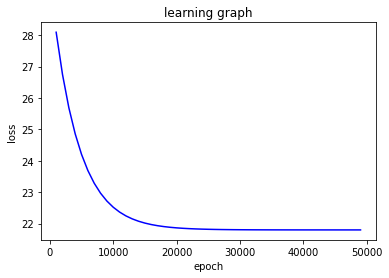

In [14]:
plt.plot(history[1:,0],history[1:,1],'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning graph')
plt.show()

In [18]:
xse=np.array((x.min(),x.max())).reshape(-1,1)
Xse=torch.tensor(xse).float()
with torch.no_grad():
  Yse=net(Xse)
print(Yse.numpy())

[[-2.2188644]
 [45.212074 ]]


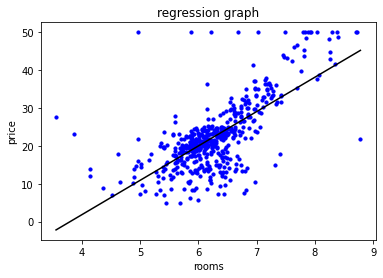

In [19]:
plt.scatter(x,yt,s=10,c='b')
plt.xlabel('rooms')
plt.ylabel('price')
plt.plot(Xse.data,Yse.data,c='k')
plt.title('regression graph')
plt.show()

In [23]:
x_add=x_org[:,feature_names=='LSTAT']
x2=np.hstack((x,x_add))
print(x2.shape)
print(x2[:5,:])
n_input=x2.shape[1]

print(n_input)
net=Net(n_input,n_output)
inputs=torch.tensor(x2).float()

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]
2


In [26]:
lr=0.0001
net=Net(n_input,n_output)
criterion=nn.MSELoss()
optimizer=optim.SGD(net.parameters(),lr=lr)
num_epochs=50000
history=np.zeros((0,2))
for epoch in range(num_epochs):
  optimizer.zero_grad()
  outputs=net(inputs)
  loss=criterion(outputs,labels1)/2.0
  loss.backward()
  optimizer.step()
  if epoch%1000==0:
    history=np.vstack((history,np.array([epoch,loss.item()])))
    print(f'Epoch {epoch} loss: {loss.item():.5f}')


Epoch 0 loss: 112.06398
Epoch 1000 loss: 25.46952
Epoch 2000 loss: 16.41556
Epoch 3000 loss: 15.40709
Epoch 4000 loss: 15.29474
Epoch 5000 loss: 15.28220
Epoch 6000 loss: 15.28077
Epoch 7000 loss: 15.28059
Epoch 8000 loss: 15.28055
Epoch 9000 loss: 15.28051
Epoch 10000 loss: 15.28049
Epoch 11000 loss: 15.28045
Epoch 12000 loss: 15.28043
Epoch 13000 loss: 15.28040
Epoch 14000 loss: 15.28037
Epoch 15000 loss: 15.28034
Epoch 16000 loss: 15.28031
Epoch 17000 loss: 15.28028
Epoch 18000 loss: 15.28026
Epoch 19000 loss: 15.28023
Epoch 20000 loss: 15.28020
Epoch 21000 loss: 15.28017
Epoch 22000 loss: 15.28014
Epoch 23000 loss: 15.28012
Epoch 24000 loss: 15.28009
Epoch 25000 loss: 15.28006
Epoch 26000 loss: 15.28003
Epoch 27000 loss: 15.28000
Epoch 28000 loss: 15.27997
Epoch 29000 loss: 15.27994
Epoch 30000 loss: 15.27992
Epoch 31000 loss: 15.27989
Epoch 32000 loss: 15.27986
Epoch 33000 loss: 15.27983
Epoch 34000 loss: 15.27980
Epoch 35000 loss: 15.27978
Epoch 36000 loss: 15.27975
Epoch 37000 l

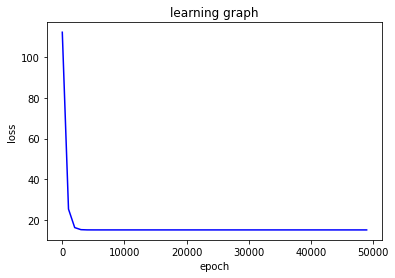

In [27]:
plt.plot(history[:,0],history[:,1],'b')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('learning graph')
plt.show()